# **Final Project**
##Data Analytics 1 Fall 2023

###Jun Hanvey and Kellen Nankervis


# Starbucks Marketing Strategy
While Starbucks is one of the most popular coffee chains worldwide, no marketing strategy is perfect. Our objective on this project is to determine how Starbucks can change their methods in order to increase transaction amount per customer.


In [ ]:
import pandas as pd, numpy as np, os, matplotlib.pyplot as plt, statsmodels.formula as smf
from google.colab import drive
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

drive.mount('drive', force_remount=True)

Mounted at drive


In [ ]:
fpath = ('drive/MyDrive/Anly6100/')
df = pd.read_csv(fpath + 'starbucks_promos.csv', index_col = 0)
df.head()



,uid,event,time,gender,age,register_date,income,offer_id,offer_reward,channels,difficulty,duration,offer_type,offer_time,transaction_amount,redeem_time,redeemed
1,0020c2b971eb4e9188eac86d93036a77,offer received,0,F,59,20160304,90000.0,fafdcd668e3743c1bb461111dcafc2a4,2.0,"['web', 'email', 'mobile', 'social']",10.0,240.0,discount,0.0,17.63,54.0,1
4,005500a7188546ff8a767329a2f7c76a,offer received,0,M,56,20171209,47000.0,ae264e3637204a6fb9bb56bc8210ddfd,10.0,"['email', 'mobile', 'social']",10.0,168.0,bogo,0.0,NaN,NaN,0
5,0056df74b63b4298809f0b375a304cf4,offer received,0,M,54,20160821,91000.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,"['web', 'email', 'mobile']",5.0,168.0,bogo,0.0,27.86,132.0,1
6,00715b6e55c3431cb56ff7307eb19675,offer received,0,F,58,20171207,119000.0,ae264e3637204a6fb9bb56bc8210ddfd,10.0,"['email', 'mobile', 'social']",10.0,168.0,bogo,0.0,27.26,12.0,1
8,00840a2ca5d2408e982d56544dc14ffd,offer received,0,M,26,20141221,61000.0,2906b810c7d4411798c6938adc9daaa5,2.0,"['web', 'email', 'mobile']",10.0,168.0,discount,0.0,6.05,540.0,1


# Data Cleaning



In [ ]:
df = df.loc[(df.income.notnull() & df.transaction_amount.notnull())]
df.head()

,uid,event,time,gender,age,register_date,income,offer_id,offer_reward,channels,difficulty,duration,offer_type,offer_time,transaction_amount,redeem_time,redeemed
1,0020c2b971eb4e9188eac86d93036a77,offer received,0,F,59,20160304,90000.0,fafdcd668e3743c1bb461111dcafc2a4,2.0,"['web', 'email', 'mobile', 'social']",10.0,240.0,discount,0.0,17.63,54.0,1
5,0056df74b63b4298809f0b375a304cf4,offer received,0,M,54,20160821,91000.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,"['web', 'email', 'mobile']",5.0,168.0,bogo,0.0,27.86,132.0,1
6,00715b6e55c3431cb56ff7307eb19675,offer received,0,F,58,20171207,119000.0,ae264e3637204a6fb9bb56bc8210ddfd,10.0,"['email', 'mobile', 'social']",10.0,168.0,bogo,0.0,27.26,12.0,1
8,00840a2ca5d2408e982d56544dc14ffd,offer received,0,M,26,20141221,61000.0,2906b810c7d4411798c6938adc9daaa5,2.0,"['web', 'email', 'mobile']",10.0,168.0,discount,0.0,6.05,540.0,1
11,0091d2b6a5ea4defaa8393e4e816db60,offer received,0,F,62,20160617,81000.0,4d5c57ea9a6940dd891ad53e9dbe8da0,10.0,"['web', 'email', 'mobile', 'social']",10.0,120.0,bogo,0.0,18.26,6.0,1


# **Exploratory Data Analysis**

In [ ]:
df.corr(numeric_only = 1)

,time,age,register_date,income,offer_reward,difficulty,duration,offer_time,transaction_amount,redeem_time,redeemed
time,1.000000,0.001206,-0.003625,-0.001097,0.000665,-0.011778,-0.013978,1.000000,0.003674,0.917922,NaN
age,0.001206,1.000000,0.006327,0.314453,0.031758,0.023981,-0.008370,0.001206,0.061458,-0.007667,NaN
register_date,-0.003625,0.006327,1.000000,0.005313,0.022830,-0.001195,-0.013392,-0.003625,0.014430,0.016353,NaN
income,-0.001097,0.314453,0.005313,1.000000,0.078920,0.051042,-0.016728,-0.001097,0.153702,-0.028451,NaN
offer_reward,0.000665,0.031758,0.022830,0.078920,1.000000,0.069142,-0.460156,0.000665,0.047228,-0.025015,NaN
difficulty,-0.011778,0.023981,-0.001195,0.051042,0.069142,1.000000,0.626360,-0.011778,0.056584,0.062062,NaN
duration,-0.013978,-0.008370,-0.013392,-0.016728,-0.460156,0.626360,1.000000,-0.013978,0.006744,0.055949,NaN
offer_time,1.000000,0.001206,-0.003625,-0.001097,0.000665,-0.011778,-0.013978,1.000000,0.003674,0.917922,NaN
transaction_amount,0.003674,0.061458,0.014430,0.153702,0.047228,0.056584,0.006744,0.003674,1.000000,-0.005752,NaN
redeem_time,0.917922,-0.007667,0.016353,-0.028451,-0.025015,0.062062,0.055949,0.917922,-0.005752,1.000000,NaN


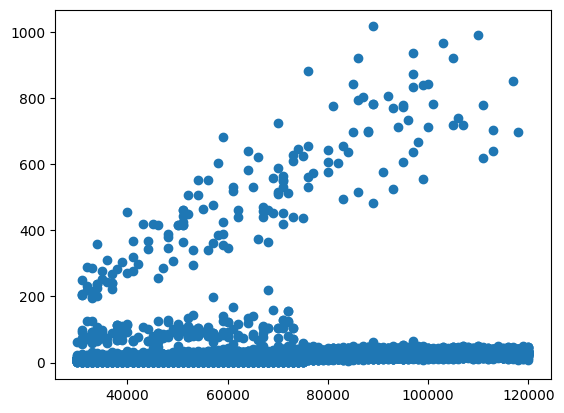

In [ ]:
plt.scatter(df.income, df.transaction_amount)




-Increase transaction amount
-Exploratory data analysis
-Graphs by age and gender and discount type/difficulty income  
